## Midterm Project: FBI Crime Data
By Raj Saluja (November 20, 2019)

### Abstract
* In this lab I am using a dataset that contains data about crimes
* I am hoping to answer a few questions
    1. What is the linear regression of the number of violent crimes per year?
    2. What is the most prevelant type of crime (based on average)?
    3. What was the ammount of violent crime in 2016 and how does it compare to the average?

### Dataset Exploration

In [2]:
import math as m
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

Here I imported all of the different things that I might need to use during this project.

In [3]:
my_df = pd.read_excel('Crime Data.xls', encoding = "iso-8859-1")

Here I had pandas read my dataset so I can use it moving forward. I made a variable for this datasat called my_df.

In [4]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 22 columns):
Table 1        30 non-null object
               21 non-null object
Unnamed: 2     21 non-null object
Unnamed: 3     23 non-null object
Unnamed: 4     21 non-null object
Unnamed: 5     21 non-null object
Unnamed: 6     6 non-null object
Unnamed: 7     5 non-null object
Unnamed: 8     21 non-null object
Unnamed: 9     21 non-null object
Unnamed: 10    21 non-null object
Unnamed: 11    21 non-null object
Unnamed: 12    21 non-null object
Unnamed: 13    22 non-null object
Unnamed: 14    21 non-null object
Unnamed: 15    23 non-null object
Unnamed: 16    22 non-null object
Unnamed: 17    21 non-null object
Unnamed: 18    21 non-null object
Unnamed: 19    22 non-null object
Unnamed: 20    21 non-null object
Unnamed: 21    21 non-null object
dtypes: object(22)
memory usage: 7.8+ KB


Here I used .info to get a better feel for what my dataset is like. I see that there are 22 columns and 45 rows. 

In [5]:
my_df.head()

,Table 1,,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Crime in the United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"by Volume and Rate per 100,000 Inhabitants, 19...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Year,Population1,Violent\ncrime2,Violent \ncrime \nrate,Murder and\nnonnegligent \nmanslaughter,Murder and \nnonnegligent \nmanslaughter \nrate,Rape\n(revised \ndefinition3),Rape\n(revised \ndefinition) \nrate3,Rape\n(legacy \ndefinition4),Rape\n(legacy \ndefinition) \nrate4,...,Aggravated \nassault,Aggravated \nassault rate,Property \ncrime,Property \ncrime \nrate,Burglary,Burglary \nrate,Larceny-\ntheft,Larceny-\ntheft rate,Motor \nvehicle \ntheft,Motor \nvehicle \ntheft \nrate
3,1997,267783607,1636096,611,18208,6.8,NaN,NaN,96153,35.9,...,1023201,382.1,11558475,4316.3,2460526,918.8,7743760,2891.8,1354189,505.7
4,1998,270248003,1533887,567.6,16974,6.3,NaN,NaN,93144,34.5,...,976583,361.4,10951827,4052.5,2332735,863.2,7376311,2729.5,1242781,459.9


Here I printed the head of my dataset to make sure it worked and see if there were any issues. It works but I instantly see that there are some problems with the headers that I will need to fix.

In [6]:
labels = ["year", "population", "violent crime", "violent crime rate", "murder and nonnegligent manslaughter", "murder and nonnegligent manslaughter rate", "rape (revised definition)", "rape (revised definition) rate", "rape (legacy definition)", "rape (legacy definition) rate", "robbery", "robbery rate", "aggravated assault", "aggravated assault rate", "property crime", "property crime rate", "burglary", "burglary rate", "larceny theft", "larceny theft rate", "motor  vehicle theft", "motor vehicle theft rate"] 
df = pd.read_excel('Crime Data.xls', encoding = "iso-8859-1",
                  header=3,
                  names=labels)
index_col=False
df.head()

,year,population,violent crime,violent crime rate,murder and nonnegligent manslaughter,murder and nonnegligent manslaughter rate,rape (revised definition),rape (revised definition) rate,rape (legacy definition),rape (legacy definition) rate,...,aggravated assault,aggravated assault rate,property crime,property crime rate,burglary,burglary rate,larceny theft,larceny theft rate,motor vehicle theft,motor vehicle theft rate
0,1997,267783607.0,1636096.0,611,18208.0,6.8,NaN,NaN,96153.0,35.9,...,1023201.0,382.1,11558475.0,4316.3,2460526,918.8,7743760.0,2891.8,1354189.0,505.7
1,1998,270248003.0,1533887.0,567.6,16974.0,6.3,NaN,NaN,93144.0,34.5,...,976583.0,361.4,10951827.0,4052.5,2332735,863.2,7376311.0,2729.5,1242781.0,459.9
2,1999,272690813.0,1426044.0,523,15522.0,5.7,NaN,NaN,89411.0,32.8,...,911740.0,334.3,10208334.0,3743.6,2100739,770.4,6955520.0,2550.7,1152075.0,422.5
3,2000,281421906.0,1425486.0,506.5,15586.0,5.5,NaN,NaN,90178.0,32.0,...,911706.0,324,10182584.0,3618.3,2050992,728.8,6971590.0,2477.3,1160002.0,412.2
4,20015,285317559.0,1439480.0,504.5,16037.0,5.6,NaN,NaN,90863.0,31.8,...,909023.0,318.6,10437189.0,3658.1,2116531,741.8,7092267.0,2485.7,1228391.0,430.5


Here I replaced the headers to make it only one row of headers. This made it so the dataset is much easier to understand and got rid of almost all of the NaNs that were present because of the weird headers. I made this a new variable so it wouldn't impact the results I got earlier. On the first line I wrote the new headers. On the second line I had pandas read the dataset, on the third line I states that rows 0, 1, 2, and 3 were header rows that needed to be deleted, and on the fourth line I replaced the headers with the ones I wrote. I then added a piece of code that I will need in order to remove certain rows later on on line five. Finally, I printed the head of the dataset to make sure it worked, and it did.

In [7]:
df.tail()

,year,population,violent crime,violent crime rate,murder and nonnegligent manslaughter,murder and nonnegligent manslaughter rate,rape (revised definition),rape (revised definition) rate,rape (legacy definition),rape (legacy definition) rate,...,aggravated assault,aggravated assault rate,property crime,property crime rate,burglary,burglary rate,larceny theft,larceny theft rate,motor vehicle theft,motor vehicle theft rate
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here I printed the end of my dataset to make sure there weren't any notes at the end that could cause issues but there were. I need to remove these rows in order to use the dataset.

In [8]:
df.tail(23)

,year,population,violent crime,violent crime rate,murder and nonnegligent manslaughter,murder and nonnegligent manslaughter rate,rape (revised definition),rape (revised definition) rate,rape (legacy definition),rape (legacy definition) rate,...,aggravated assault,aggravated assault rate,property crime,property crime rate,burglary,burglary rate,larceny theft,larceny theft rate,motor vehicle theft,motor vehicle theft rate
19,2016,323127513.0,1248185.0,386.3,17250.0,5.3,130603,40.4,95730.0,29.6,...,803007.0,248.5,7919035.0,2450.7,1515096,468.9,5638455.0,1745,765484.0,236.9
20,1 Populations are U.S. Census Bureau provision...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,2 The violent crime figures include the offens...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,3 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,4 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN
24,5 The murder and nonnegligent homicides that o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
25,6 The crime figures have been adjusted.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN
26,NOTE: Although arson data are included in the...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here I printed the end of my dataset to see how many rows needed to be removed. I saw that after row 19 every row needed to be removed because they didn't have any data.

In [9]:
df.drop([20], inplace=True)
df.drop([21], inplace=True)
df.drop([22], inplace=True)
df.drop([23], inplace=True)
df.drop([24], inplace=True)
df.drop([25], inplace=True)
df.drop([26], inplace=True)
df.drop([27], inplace=True)
df.drop([28], inplace=True)
df.drop([29], inplace=True)
df.drop([30], inplace=True)
df.drop([31], inplace=True)
df.drop([32], inplace=True)
df.drop([33], inplace=True)
df.drop([34], inplace=True)
df.drop([35], inplace=True)
df.drop([36], inplace=True)
df.drop([37], inplace=True)
df.drop([38], inplace=True)
df.drop([39], inplace=True)
df.drop([40], inplace=True)
df.drop([41], inplace=True)
df.tail()

,year,population,violent crime,violent crime rate,murder and nonnegligent manslaughter,murder and nonnegligent manslaughter rate,rape (revised definition),rape (revised definition) rate,rape (legacy definition),rape (legacy definition) rate,...,aggravated assault,aggravated assault rate,property crime,property crime rate,burglary,burglary rate,larceny theft,larceny theft rate,motor vehicle theft,motor vehicle theft rate
15,2012,313873685.0,1217057.0,387.8,14856.0,4.7,NaN,NaN,85141.0,27.1,...,762009.0,242.8,9001992.0,2868,2109932,672.2,6168874.0,1965.4,723186.0,230.4
16,2013,316497531.0,1168298.0,369.1,14319.0,4.5,113695,35.9,82109.0,25.9,...,726777.0,229.6,8651892.0,2733.6,1932139,610.5,6019465.0,1901.9,700288.0,221.3
17,2014,318907401.0,1153022.0,361.6,14164.0,4.4,118027,37.0,84864.0,26.6,...,731089.0,229.2,8209010.0,2574.1,1713153,537.2,5809054.0,1821.5,686803.0,215.4
18,20156,320896618.0,1199310.0,373.7,15883.0,4.9,126134,39.3,91261.0,28.4,...,764057.0,238.1,8024115.0,2500.5,1587564,494.7,5723488.0,1783.6,713063.0,222.2
19,2016,323127513.0,1248185.0,386.3,17250.0,5.3,130603,40.4,95730.0,29.6,...,803007.0,248.5,7919035.0,2450.7,1515096,468.9,5638455.0,1745,765484.0,236.9


Here I removed all the rows that had notes and no data. I then printed the tail to make sure it worked, and it did.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 22 columns):
year                                         20 non-null object
population                                   20 non-null float64
violent crime                                20 non-null float64
violent crime rate                           20 non-null object
murder and nonnegligent manslaughter         20 non-null float64
murder and nonnegligent manslaughter rate    20 non-null float64
rape (revised definition)                    5 non-null object
rape (revised definition) rate               4 non-null float64
rape (legacy definition)                     20 non-null float64
rape (legacy definition) rate                20 non-null float64
robbery                                      20 non-null float64
robbery rate                                 20 non-null float64
aggravated assault                           20 non-null float64
aggravated assault rate                      20 non-null 

Here I checked to see how many rows there were after I cleaned my dataset.

In this section I learned all of the columns of my dataset so I know what it goes over. This helped me to come up with the questions I want to answer in this project. I also learned that there are 22 columns and there were 45 rows to start. I then cleaned up the headers and notes at the end of the dataset which made the number of rows 22.

### Data Modeling

In [11]:
df.iloc[:, 2].values.reshape(-1, 1)
X = df.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.iloc[:, 2].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

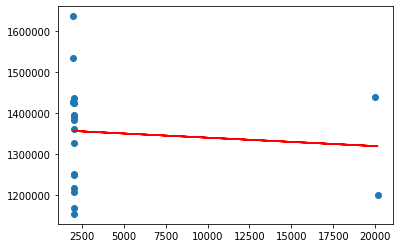

In [12]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

Here I made a linear regression of violent crime over time. I made the regression line, which is based on the amount of violent crime on the y-axis and the year on the x-axis, red. I will analyze this in the next section.

In [13]:
df.describe()

,population,violent crime,murder and nonnegligent manslaughter,murder and nonnegligent manslaughter rate,rape (revised definition) rate,rape (legacy definition),rape (legacy definition) rate,robbery,robbery rate,aggravated assault,property crime,burglary rate,larceny theft,motor vehicle theft,motor vehicle theft rate
count,2.000000e+01,2.000000e+01,20.00000,20.000000,4.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01,20.000000,2.000000e+01,2.000000e+01,20.000000
mean,2.986348e+08,1.352038e+06,16006.40000,5.375000,38.150000,90689.950000,30.500000,399833.950000,135.015000,8.455074e+05,9.685756e+06,703.195000,6.590070e+06,1.010867e+06,343.535000
std,1.710309e+07,1.280568e+05,1104.92145,0.602517,2.063169,4307.024012,2.777731,48106.378214,22.824186,8.006383e+04,9.896502e+05,107.945427,5.723013e+05,2.478430e+05,100.403037
min,2.677836e+08,1.153022e+06,14164.00000,4.400000,35.900000,82109.000000,25.900000,322905.000000,101.300000,7.267770e+05,7.919035e+06,468.900000,5.638455e+06,6.868030e+05,215.400000
25%,2.873098e+08,1.240403e+06,15263.25000,4.875000,36.725000,88329.000000,28.225000,354974.750000,113.700000,7.773972e+05,9.040055e+06,693.800000,6.164429e+06,7.354702e+05,235.275000
50%,3.005098e+08,1.387210e+06,16092.50000,5.500000,38.150000,91062.000000,31.100000,409056.500000,141.650000,8.532055e+05,9.950906e+06,727.850000,6.608952e+06,1.126274e+06,382.550000
75%,3.121593e+08,1.425626e+06,16798.50000,5.700000,39.575000,94378.250000,32.325000,428558.500000,148.350000,8.958110e+05,1.034884e+07,741.200000,6.985393e+06,1.236357e+06,424.500000
max,3.231275e+08,1.636096e+06,18208.00000,6.800000,40.400000,96153.000000,35.900000,498534.000000,186.200000,1.023201e+06,1.155848e+07,918.800000,7.743760e+06,1.354189e+06,505.700000


Here I described the dataset to find the most prevelent type of crime. I will be analyzing this in the next section.

In [14]:
gk = df.groupby('year') 

twenty_sixteen = gk.get_group('2016') 
twenty_sixteen

,year,population,violent crime,violent crime rate,murder and nonnegligent manslaughter,murder and nonnegligent manslaughter rate,rape (revised definition),rape (revised definition) rate,rape (legacy definition),rape (legacy definition) rate,...,aggravated assault,aggravated assault rate,property crime,property crime rate,burglary,burglary rate,larceny theft,larceny theft rate,motor vehicle theft,motor vehicle theft rate
19,2016,323127513.0,1248185.0,386.3,17250.0,5.3,130603,40.4,95730.0,29.6,...,803007.0,248.5,7919035.0,2450.7,1515096,468.9,5638455.0,1745,765484.0,236.9


Here I made a groupby for 2016 in order to find the data for just that year. I will be analyzing this data in the next section.

### Data Analysis

The linear regression shows me that the amount of crime has gone down over time, which is a positive sign that crime will continue to go down in the future. This tells me that the United States is going to get afer over time, and that is a very encouraging sign for things to come. If the United States can continue to get safer at the rate it is currently at there will be very little violent crime for future generations.

When I used df.describe() I was able to see all of the averages of each column. This way I could look through them to see which one is the largest and that tells me what the most prevelent type of crime is. After looking through it, I have found that the most prevelent type of crime is property crime. Property crime is likely crimes like vandalism and arson that cause the destruction of property.

The amout of violent crime in 2016 was much lower than the average with 1248185.0 being the total number compared to the average of 1.352038e+06, and this affirms what my linear regression told me about how the amount of violent crime has gone down over time. This tells me that the United States is continuing to get safer despite the growing population, and at this rate it will be incredibly safe very soon.

### Conclusions

The linear regression was pretty unexpected for me because I assumed that since the population has been going up over time the amount of violent crime would also go up because there would be more people to commit crimes. This is wrong, however, as the amount of violent crime has gone down as the population has gone up. This tells me that population does not play as large of a role in the amount of violent crime as I thought. It also makes me wonder what has caused the amount of violent crime to go down over time and what we can do to continue that trend. These are both areas for future exploration. This answers my first question about the linear regression of the amount of violent crime over time.

Property crime being the most prevelent makes a lot of sense to me because it seems like the other crimes were a lot more serious and therefore less likely to occur because they have larger consequences. I have always considered different property crimes like vandalism to be very common and not nearly as bad as other crimes, though they are still very bad. One question this raises for me is whether or not property crimes qualifies as violent crime and contributes to that number because though property crime doesn't appear to be violent it is a very broad term and there could be some violent aspects to it. I looked back at my df.describe() and found that the number for property crime was larger than the number for violent crime so there is no way property crime was part of that category. This makes me wonder what types of crime are part of violent crime. This is an area for future exploration. This answers my second question about the most prevelent type of crime.

It wasn't surprising to hear that the amout of violent crime was very low in 2016 after seeing my linear regression, but it definitley would have been surprising had I not seen the graph because I expected the amounf of violent crime to go up due to a rising population. This makes me wonder if the population has grown at the rate I had expected it to because if not it would make a lot more sense why the amount of violent crime has gone down. This is an area for future exploration. This answers my third question about how much violent crime there was in 2016.

### Areas For Future Exploration
* What has caused the amount of violent crime to go down over time and what can we do to continue that trend?
* How large of a role does population play in the amount of violent crime?
* What types of crime classify as a violent crime?
* What types of crime calssify as a property crime?
* What rate has the United States population grown at?

### Acknowledgements

I would like to thank Ms. Sconyers and this website: https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d. They were both very helpful when I was writing my code.